# Data Description

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.

There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/raw/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


We pulled the Basket ball dataset from the github through the link. 

1) Column names are in short description. So, we will update it from project info for better understanding in next step.

2) The value is not in same way so will use scaling method in further step in the process.

In [3]:
df=df.rename(columns={'W':'Wins','R':'Runs','AB':'At Bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walks','SO':'Strikeouts','SB':'Stolen Bases','RA':'Runs Allowed','ER':'Earned Runs','ERA':'Earned Run Average','SHO':'Shutouts','SV':'Saves','E':'Errors','CG':'Caught'}) 
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Caught,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df=df[['Runs','At Bats','Hits','Doubles','Triples','Homeruns','Walks','Strikeouts','Stolen Bases','Runs Allowed','Earned Runs','Earned Run Average','Caught','Shutouts','Saves','Errors','Wins']]
df.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Caught,Shutouts,Saves,Errors,Wins
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


We have re-arraged the dataframe becasue W(Wins) is the target column. Hence we moved to last for better understanding.

In [5]:
df.dtypes

Runs                    int64
At Bats                 int64
Hits                    int64
Doubles                 int64
Triples                 int64
Homeruns                int64
Walks                   int64
Strikeouts              int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
Caught                  int64
Shutouts                int64
Saves                   int64
Errors                  int64
Wins                    int64
dtype: object

We have a 17 columns in the dataset which are in int & float type.

In [6]:
df.shape

(30, 17)

We have a 30 rows and 17 columns in the dataset.

In [7]:
df.isnull().sum()

Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Homeruns              0
Walks                 0
Strikeouts            0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Caught                0
Shutouts              0
Saves                 0
Errors                0
Wins                  0
dtype: int64

Based on the above info - We don't have a null value in the dataset. However, we can visualization this data through heatmap.

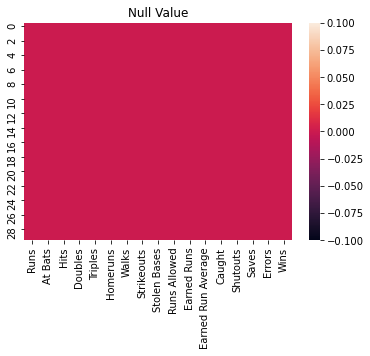

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

Just I ensure through visualization - We don't gave a null value in the dataset.

# Describe Dataset

In [9]:
#Statistical Summary
df.describe()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Caught,Shutouts,Saves,Errors,Wins
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


We have a outlier and skewness in the columns in the dataset. So we will check in further step

# Correlation

In [10]:
df.corr()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Caught,Shutouts,Saves,Errors,Wins
Runs,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
At Bats,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
Hits,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
Doubles,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
Triples,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
Homeruns,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
Walks,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
Strikeouts,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
Stolen Bases,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
Runs Allowed,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


We got the correlation result from the dataset. But It is difficult to understand the result Hence we are visualization this result through heatmap.

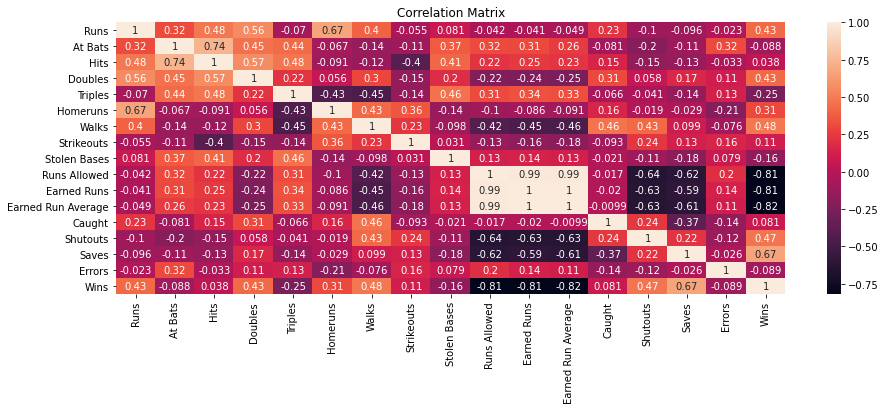

In [11]:
corr_mat=df.corr()
plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Hence, I have listed below on ascending order

Positive Sign:

1)Save has 67%, 2)Walks has 48%, 3)shutout has 47%, 4)Runs & Doubles have 43% each, 5)Homeruns has 31%, 6)strikeout has 11%, 7)caught has 8%, 8)Hits has 4%.

Negative Sign:

1) Run Allowed, Earned Runs & Earned Run Average have 80% but it is interconnected with each data. 2) Triples has 25%, 3)Stolen Bases has 16%, 4)At Bats & Error have 9% each.

# Outlier Checking 

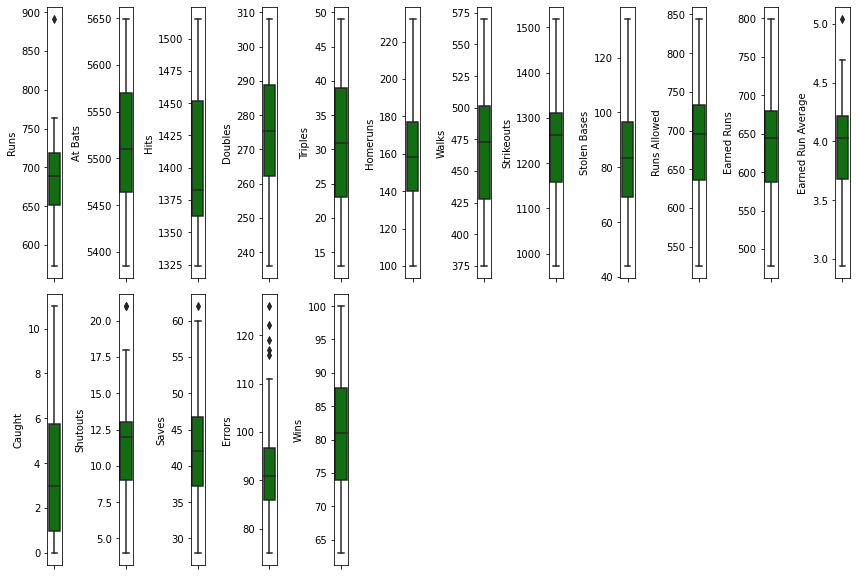

In [12]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In the above - we have a outlier in some of the columns which are Errors, Saves, shutouts, Earned Run Average & Runs.

Error columns having a more outlier when comparing to other outlier columns. Because other outlier columns are near to Whisker So,we will rectify in further step

# Checking Skewness

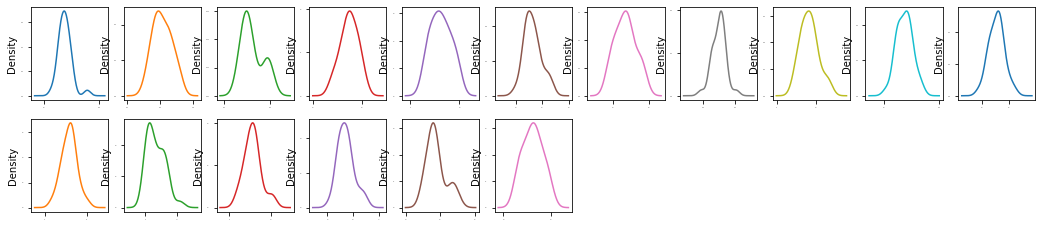

In [13]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

In [14]:
df.skew()

Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Caught                0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
Wins                  0.047089
dtype: float64

From the above info - we can see the skewness in the dataset. So, We will rectify this in upcoming step.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z.shape)
threshold=3
print(np.where(z>3))

(30, 17)
(array([5], dtype=int64), array([0], dtype=int64))


In [16]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


We have applied ZSCORE technic for removing outlier in the dataset.

In [17]:
Loss_percentage=(30-29)/30*100
print(Loss_percentage)

3.3333333333333335


After removing the outlier - we have only 3% dataloss. So it is good to go with this data.

I have tried both IQR and Zscore to remove outlier both are getting the same report. Hence I am going with zscore.

In [18]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

I have created the feature and target columns. It will help me to do trian & test for preparing model

# Data Transform for Remove Skewness

In [19]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF=pd.DataFrame(DF,columns=X.columns)

In [20]:
DF.skew()

Runs                 -0.024842
At Bats               0.000000
Hits                  0.000000
Doubles              -0.052793
Triples              -0.075139
Homeruns              0.000448
Walks                -0.008572
Strikeouts            0.051530
Stolen Bases         -0.009570
Runs Allowed         -0.011974
Earned Runs          -0.004988
Earned Run Average   -0.000401
Caught               -0.045947
Shutouts              0.000529
Saves                -0.000925
Errors                0.065585
dtype: float64

We have removed the skewness from the dadaset. Let use this for model preparation.

# Finding the best model and Random State

In [21]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,10):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    PX1=LR.predict(x_train)
    PY1=LR.predict(x_test)
    R2 = r2_score(Y_test, PY1)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 78.1859149476459 on Random state 8


In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,10):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    LA =Lasso()
    LA.fit(x_train,Y_train)
    PX2=LA.predict(x_train)
    PY2=LA.predict(x_test)
    R2 = r2_score(Y_test, PY2)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 93.8671681688767 on Random state 1


In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,10):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    RR =Ridge()
    RR.fit(x_train,Y_train)
    PX3=RR.predict(x_train)
    PY3=RR.predict(x_test)
    R2 = r2_score(Y_test,PY3)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 90.33972135708785 on Random state 1


In [46]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

maxAccu=0
maxRS=0
for i in range (0,10):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=i)
    EL =ElasticNet()
    EL.fit(x_train,Y_train)
    PX4=EL.predict(x_train)
    PY4=EL.predict(x_test)
    R2 = r2_score(Y_test,PY4)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 90.48565445805212 on Random state 1


Best Accuracy score got from the model which are below i have listed:

1) LinearRegression score is - 78%  
2) Lasso score is - 94%  
3) Ridge score is - 90%  
4) ElasticNet score is - 91%

Based on the above score - Lasso got the high score which is 94%. However, we will check with cross validation score then finalize the model.

# Creating the Train_Test_Split

In [47]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.30,random_state=1)

# Cross-Validation of the Model

In [48]:
from sklearn.model_selection import cross_val_score
cv1_score=cross_val_score(LR,x,Y,cv=4)
cv2_score=cross_val_score(LA,x,Y,cv=4)
cv3_score=cross_val_score(RR,x,Y,cv=4)
cv4_score=cross_val_score(EL,x,Y,cv=4)
cv1_mean=cv1_score.mean()
cv2_mean=cv2_score.mean()
cv3_mean=cv3_score.mean()
cv4_mean=cv4_score.mean()
print(f"Cross Validation Score of is :",cv1_mean*100)
print(f"Cross Validation Score of is :",cv2_mean*100)
print(f"Cross Validation Score of is :",cv3_mean*100)
print(f"Cross Validation Score of is :",cv4_mean*100)

Cross Validation Score of is : 15.39608474603822
Cross Validation Score of is : 75.1391540891423
Cross Validation Score of is : 64.03129447487272
Cross Validation Score of is : 72.17119072361493


We have a cross validation score which will help us to choose the model.

I have choosed the Lasso model because it have 19% minimum difference with cross validation score.

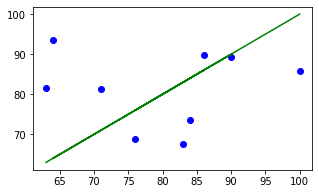

In [53]:
plt.figure(figsize=(5,3))
plt.scatter(x=Y_test,y=PY2,color='b')
plt.plot(Y_test,Y_test,color='g')
plt.show()

# Regularization

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10, 100],'random_state':list(range(0,100))}
EA=ElasticNet()
clf=GridSearchCV(EA,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [55]:
EA=ElasticNet(alpha=1,random_state=0)
EA.fit(x_train,Y_train)
EA.score(x_train,Y_train)
predict=EA.predict(x_test)
ls=r2_score(Y_test,predict)
print("Lasso Score :",ls*100)

cv_score=cross_val_score(EA,x,Y,cv=4)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Lasso Score : 90.48565445805212
CV Score : 72.17119072361493


# Ensemblie Technique

In [56]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [57]:
RF=RandomForestRegressor(criterion="mse",max_features="sqrt")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=4)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 65.9212645590682
CV Score : 41.07022210159618


# Model Saving

In [58]:
import pickle
filename='BaseBall_Project.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [59]:
Loaded_load = pickle.load(open('BaseBall_Project.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.659212645590682


In [60]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8
Predicted,89.69,80.9,76.06,83.84,84.71,89.97,79.19,86.22,69.96
Original,89.69,80.9,76.06,83.84,84.71,89.97,79.19,86.22,69.96


Output from the model - The Prediction is seems like very accurate. So the model is performing very well